## testing out functions in tree_utils.py
first, lets load in the necessary libraries...

In [1]:
import networkx as nx
import tree_utils
import pickle

### visualizing graphs
first, we can create a grid graph and use the `draw()` function to look at it.

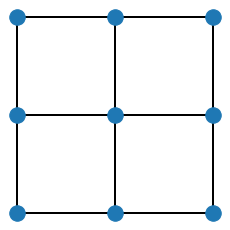

In [2]:
graph = nx.grid_graph(dim=(3,3)) # change the dimensions of the graph, the plot will resize
tree_utils.draw(graph)

we can also add colors to the edges.

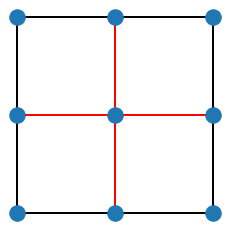

In [3]:
# make all edges connected to node (1,1) red
for u, v, data in graph.edges(data=True):
    if (1,1) in (u,v): # make all edges connected to node (1,1) red
        data['c'] = 'red'
    else:
        data['c'] = 'black'
tree_utils.draw(graph, colors='c')

### drawing different spanning trees 
we can use the `uniform_random_spanning_tree()` function to draw USTs on a grid.

adding the optional `delay` argument lets us reflect on the graph for a while.

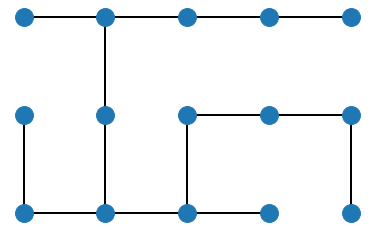

In [4]:
graph = nx.grid_graph(dim=(3,5))
for i in range(20):
    UST = tree_utils.uniform_random_spanning_tree(graph)
    tree_utils.draw(UST, delay=.1)

we can also use the `random_minimum_spanning_tree()` function to draw MSTs on the grid in the same way.

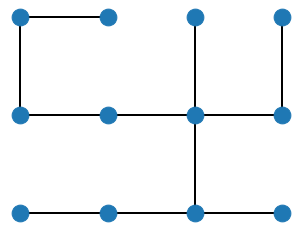

In [5]:
graph = nx.grid_graph(dim=(3,4))
for i in range(10):
    MST = tree_utils.random_minimum_spanning_tree(graph)
    tree_utils.draw(MST, delay=.1)

### counting the number of spanning trees
the `find_NST()` function computes the number of spanning trees that can be drawn on the graph. as currently implemented, it is only accurate up to 6x6 grids. **TODO: change this to Parker's function**

In [7]:
graph = nx.grid_graph(dim=(4,4))
num_4x4_STs = tree_utils.find_NST(graph)
print("on a 4x4 grid: {:,} \n   true value: 100,352".format(num_4x4_STs))

graph = nx.grid_graph(dim=(7,7))
num_7x7_STs = tree_utils.find_NST(graph)
print("on a 7x7 grid: {:,} \n   true value: 19,872,369,301,840,986,112".format(num_7x7_STs))

on a 4x4 grid: 100,352 
   true value: 100,352
on a 7x7 grid: 19,872,369,301,840,785,408 
   true value: 19,872,369,301,840,986,112


### enumerating spanning trees on a grid
we can enumerate all possible spanning trees (STs) on a grid like so:
* consider a *seed* ST. 
* say that a *neighboring* ST of our seed ST is one that has precisely one edge in a different place.
* find all the neighbors of our seed ST and store them as the *1-neighbors* of our seed ST.
* loop through each 1-neighbor and start again, finding its own neighbors. if it has a neighbor we haven't seen before, store it as a *2-neighbor* of the ST.
* loop through the 2-neighbors, etc., until the number of distinct *0-n neighbors* is the same as the number of STs we're looking for

the function `enumerate_STs()` does the above work. the only required argument is the dimensions of the grid graph, but you can also let it randomize the seed by passing in a `seed=int` argument. it enumerates up to 3x3 grids nearly instantaneously, takes about 30s for a 3x4 grid, and about an hour and a half for a 4x4 grid. I've gotten it down to 35 minutes for 4x4 with some speedups, but open to new ideas...

In [33]:
%%time
neighbors = tree_utils.enumerate_STs((2,3))

0-neighbors: 1
1-neighbors: 8
2-neighbors: 6
3-neighbors: 0
---
15 unique STs
CPU times: user 52 ms, sys: 10.4 ms, total: 62.4 ms
Wall time: 56.9 ms


then, we can unpack all the spanning trees into a list and sample from them, using either our UST or MST algorithms, in order to see their distributions

In [34]:
STs = tree_utils.unpack_enumerated_STs(neighbors)

In [40]:
num_trials = 100000

In [41]:
UST_data = tree_utils.sample_STs(STs, "UST", num_trials)

100%|██████████| 100000/100000 [00:32<00:00, 3056.34it/s]


In [42]:
MST_data = tree_utils.sample_STs(STs, "MST", num_trials)

100%|██████████| 100000/100000 [00:34<00:00, 2865.19it/s]


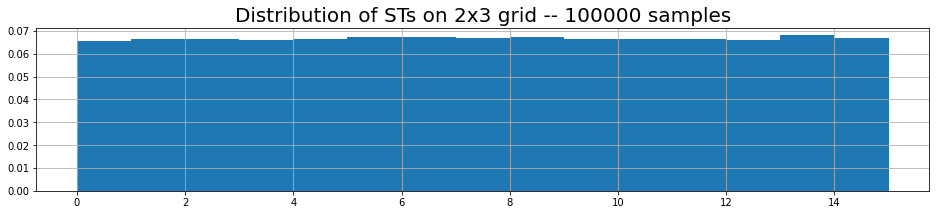

In [43]:
tree_utils.plot_sampled_STs(STs, UST_data)

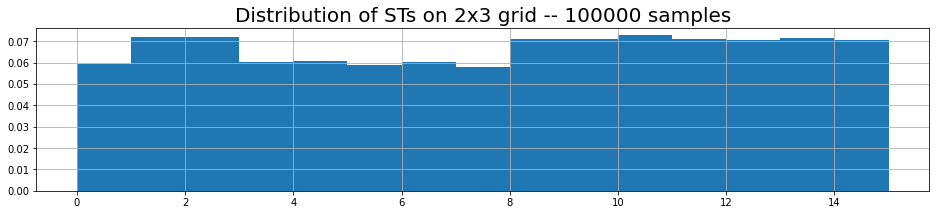

In [44]:
tree_utils.plot_sampled_STs(STs, MST_data)